In [268]:
___Author___='LumberJack Jyss'

In [269]:
print('LumberJack BRUTAL AtidotCom TREND FORECAST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom TREND FORECAST
LumberJack Jyss (c)


In [270]:
print('Importation des librairies...')
import yahoofinancials
from yahoofinancials import YahooFinancials
import talib
import time
from datetime import date,datetime
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [271]:
labasequoi =  pd.read_csv('simanim.csv')

In [272]:
simanim = labasequoi

In [273]:
simanim.head()

,Local time,audusd_Open,audusd_High,audusd_Low,audusd_Close,audusd_Volume,eurusd_Open,eurusd_High,eurusd_Low,eurusd_Close,...,usdjpy_High,usdjpy_Low,usdjpy_Close,usdjpy_Volume,return_1,return_2,return_3,return_4,return_5,trend
0,2019-03-27 23:26:00,0.70904,0.70904,0.70904,0.70904,3.90,1.12507,1.12511,1.12507,1.12510,...,110.501,110.480,110.500,51.18,-0.006335,-0.011765,-0.016289,-0.017194,-0.012670,NaN
1,2019-03-27 23:27:00,0.70904,0.70904,0.70882,0.70883,53.34,1.12510,1.12512,1.12509,1.12511,...,110.497,110.466,110.468,91.26,0.013577,0.007240,0.001810,-0.002715,-0.003620,NaN
2,2019-03-27 23:28:00,0.70885,0.70885,0.70874,0.70883,35.73,1.12511,1.12515,1.12511,1.12513,...,110.469,110.455,110.457,79.43,-0.028959,-0.015387,-0.021721,-0.027150,-0.031673,NaN
3,2019-03-27 23:29:00,0.70883,0.70883,0.70865,0.70877,41.47,1.12513,1.12514,1.12510,1.12511,...,110.478,110.456,110.469,60.94,-0.009958,-0.038914,-0.025343,-0.031677,-0.037105,NaN
4,2019-03-27 23:30:00,0.70880,0.70888,0.70864,0.70866,40.08,1.12512,1.12516,1.12512,1.12513,...,110.469,110.454,110.454,33.25,0.010864,0.000905,-0.028054,-0.014482,-0.020816,NaN


In [274]:
simanim['trend'].shift(-1)
simanim = simanim.dropna()

In [275]:
simanim.index[0]

6

In [276]:
simanim.set_index('Local time', inplace=True)

In [277]:
simanim = simanim.drop((['return_1','return_2','return_3','return_4','return_5']),axis=1)

In [278]:
simanim.head()

,audusd_Open,audusd_High,audusd_Low,audusd_Close,audusd_Volume,eurusd_Open,eurusd_High,eurusd_Low,eurusd_Close,eurusd_Volume,...,usdchf_High,usdchf_Low,usdchf_Close,usdchf_Volume,usdjpy_Open,usdjpy_High,usdjpy_Low,usdjpy_Close,usdjpy_Volume,trend
Local time,,,,,,,,,,,,,,,,,,,,,
2019-03-27 23:32:00,0.70864,0.70864,0.70856,0.70856,28.55,1.12512,1.12514,1.12503,1.12503,111.42,...,0.99445,0.99444,0.99444,7.5,110.455,110.458,110.455,110.456,40.38,0.0
2019-03-27 23:33:00,0.70856,0.70856,0.70853,0.70854,26.15,1.12503,1.12508,1.12503,1.12507,219.68,...,0.99446,0.99444,0.99444,16.5,110.456,110.464,110.456,110.464,24.76,0.0
2019-03-27 23:34:00,0.70855,0.70864,0.70854,0.70856,22.25,1.12511,1.12513,1.12506,1.12507,73.75,...,0.99444,0.99444,0.99444,10.5,110.463,110.463,110.463,110.463,11.25,0.0
2019-03-27 23:35:00,0.70855,0.70857,0.70853,0.70854,19.69,1.12507,1.12509,1.12506,1.12508,49.60,...,0.99444,0.99444,0.99444,5.5,110.463,110.463,110.455,110.457,33.70,0.0
2019-03-27 23:36:00,0.70854,0.70854,0.70853,0.70854,5.15,1.12508,1.12508,1.12507,1.12507,78.70,...,0.99445,0.99443,0.99445,16.0,110.456,110.460,110.451,110.452,36.12,0.0


In [279]:
#delta = round((date(simanim.index[simanim.shape[0]-1].year,\
 #                   simanim.index[simanim.shape[0]-1].month,simanim.index[simanim.shape[0]-1].day)\
  #             -date(simanim.index[0].year,simanim.index[0].month,simanim.index[0].day)).days)
delta = simanim.shape[0]
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  9988
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  7990  jours 
Bloc 2 : 1998  jours


In [280]:
simanim.shape

(9988, 36)

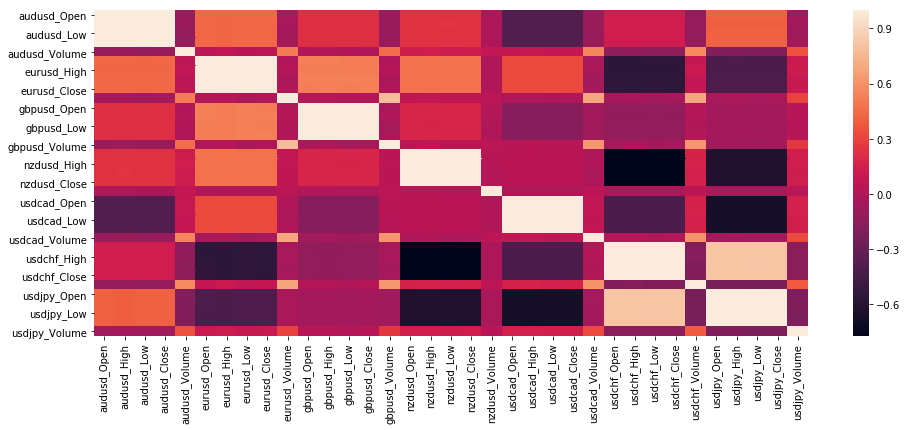

In [281]:
plt.figure(figsize=(16,6))
sns.heatmap(simanim.iloc[:,:-1].corr())
plt.show()

In [282]:
# SPLIT TRAIN ET TEST
X = simanim.iloc[:,:-1]
y = simanim.iloc[:,-1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X.iloc[:bloc1,:]
X_test = X.iloc[bloc1:,:]
y_train = y.iloc[:bloc1]
y_test = y.iloc[bloc1:]

In [283]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y.values,X.values)
result=logit_model.fit(
    start_params=None,
    method='bfgs',
    maxiter=350,
    full_output=1,
    disp=1,
    callback=None,
)
print(result.summary2())

         Current function value: nan
         Iterations: 1
         Function evaluations: 8
         Gradient evaluations: 8
                                                                  Results: MNLogit
Model:                                           MNLogit                                       Pseudo R-squared:                              nan    
Dependent Variable:                              y                                             AIC:                                           nan    
Date:                                            2019-04-14 23:12                              BIC:                                           nan    
No. Observations:                                9988                                          Log-Likelihood:                                nan    
Df Model:                                        34                                            LL-Null:                                       -877.19
Df Residuals:                            

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2154: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2155: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2154: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2155: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/statsmodels/base/model.py:508: Con

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [284]:
classifier = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.001,
    C=1,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='newton-cg',
    max_iter=1000,
    multi_class='ovr',
    verbose=1,
    warm_start=False,
    n_jobs=-1,
)
classifier.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.001,
          verbose=1, warm_start=False)

In [285]:
X_test.shape

(1998, 35)

In [286]:
y_pred = classifier.predict(X_test)

In [287]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1975    2]
 [  21    0]]


In [288]:
print('Accuracy de la regression logistique sue le test set: {:.2f}%'.format(classifier.score(X_test, y_test)*100))

Accuracy de la regression logistique sue le test set: 98.85%


In [289]:
y_pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [290]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1977
         1.0       0.00      0.00      0.00        21

   micro avg       0.99      0.99      0.99      1998
   macro avg       0.49      0.50      0.50      1998
weighted avg       0.98      0.99      0.98      1998



In [239]:
print("The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.The support is the number of occurrences of each class in y_test.")

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.The support is the number of occurrences of each class in y_test.


In [200]:
y_train.shape,y_train.sum(),y_test.shape,y_test.sum()

((7990,), 74.0, (1998,), 12.0)

In [201]:
# PHASE DEUX


In [202]:
Xtrain = simanim.iloc[:bloc1,:-1]
Xtest = simanim.iloc[bloc1:,:-1]
y = simanim.iloc[:bloc1,-1]

In [203]:
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5

clf = xgb.XGBClassifier(param)

In [204]:
boost = XGBClassifier()
boost.fit(Xtrain, y)
p_boost = boost.predict(Xtrain)
print ("Score Train -->", round(boost.score(Xtrain, y) *100,2), " %")

Score Train --> 99.19  %


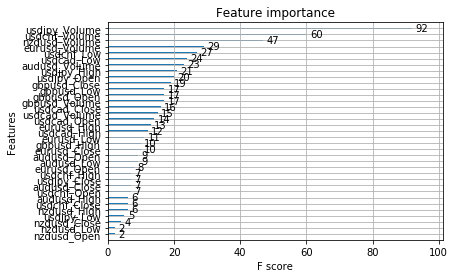

In [205]:
xgb.plot_importance(boost)

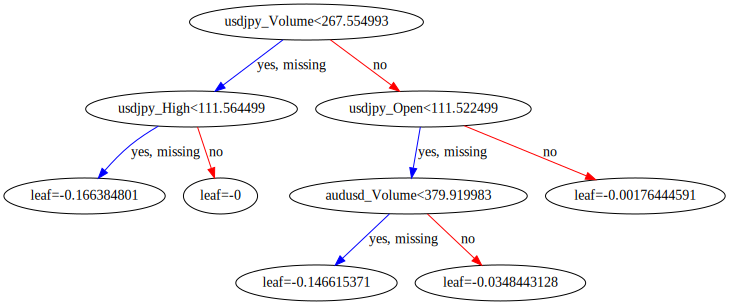

In [206]:
xgb.to_graphviz(boost, num_trees=2)

In [207]:
Xtrain.head()

,audusd_Open,audusd_High,audusd_Low,audusd_Close,audusd_Volume,eurusd_Open,eurusd_High,eurusd_Low,eurusd_Close,eurusd_Volume,...,usdchf_Open,usdchf_High,usdchf_Low,usdchf_Close,usdchf_Volume,usdjpy_Open,usdjpy_High,usdjpy_Low,usdjpy_Close,usdjpy_Volume
Local time,,,,,,,,,,,,,,,,,,,,,
2019-03-27 23:32:00,0.70864,0.70864,0.70856,0.70856,28.55,1.12512,1.12514,1.12503,1.12503,111.42,...,0.99444,0.99445,0.99444,0.99444,7.5,110.455,110.458,110.455,110.456,40.38
2019-03-27 23:33:00,0.70856,0.70856,0.70853,0.70854,26.15,1.12503,1.12508,1.12503,1.12507,219.68,...,0.99446,0.99446,0.99444,0.99444,16.5,110.456,110.464,110.456,110.464,24.76
2019-03-27 23:34:00,0.70855,0.70864,0.70854,0.70856,22.25,1.12511,1.12513,1.12506,1.12507,73.75,...,0.99444,0.99444,0.99444,0.99444,10.5,110.463,110.463,110.463,110.463,11.25
2019-03-27 23:35:00,0.70855,0.70857,0.70853,0.70854,19.69,1.12507,1.12509,1.12506,1.12508,49.60,...,0.99444,0.99444,0.99444,0.99444,5.5,110.463,110.463,110.455,110.457,33.70
2019-03-27 23:36:00,0.70854,0.70854,0.70853,0.70854,5.15,1.12508,1.12508,1.12507,1.12507,78.70,...,0.99443,0.99445,0.99443,0.99445,16.0,110.456,110.460,110.451,110.452,36.12


In [208]:
import catboost as cb

In [209]:
Xtrain = simanim.iloc[:bloc1,:-1]
Xtest = simanim.iloc[bloc1:,:-1]
y = simanim.iloc[:bloc1,-1]
simanim.shape

(9988, 36)

In [210]:
q=0
featlist = []
for bb in range(8,69):
    q+=1
    featlist.append(q)
#cat_features = featlist
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
          'l2_leaf_reg': [1,4,9],
          'iterations': [300]}

cbc = cb.CatBoostClassifier(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function='Logloss',
    border_count=None,
    feature_border_type=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    classes_count=None,
    class_weights=None,
    class_names=None,
    one_hot_max_size=None,
    random_strength=None,
    name=None,
    ignored_features=None,
    train_dir=None,
    custom_loss=None,
    custom_metric=None,
    eval_metric=None,
    bagging_temperature=None,
    save_snapshot=None,
    snapshot_file=None,
    snapshot_interval=None,
    fold_len_multiplier=None,
    used_ram_limit=None,
    gpu_ram_part=None,
    pinned_memory_size=None,
    allow_writing_files=None,
    final_ctr_computation_mode=None,
    approx_on_full_history=None,
    boosting_type=None,
    simple_ctr=None,
    combinations_ctr=None,
    per_feature_ctr=None,
    ctr_description=None,
    ctr_target_border_count=None,
    task_type=None,
    device_config=None,
    devices=None,
    bootstrap_type=None,
    subsample=None,
    sampling_unit=None,
    dev_score_calc_obj_block_size=None,
    dev_efb_max_buckets=None,
    efb_max_conflict_fraction=None,
    max_depth=None,
    n_estimators=None,
    num_boost_round=None,
    num_trees=None,
    colsample_bylevel=None,
    random_state=None,
    reg_lambda=None,
    objective=None,
    eta=None,
    max_bin=None,
    scale_pos_weight=None,
    gpu_cat_features_storage=None,
    data_partition=None,
    metadata=None,
    early_stopping_rounds=None,
    cat_features=None,
    grow_policy=None,
    min_data_in_leaf=None,
    max_leaves=None,
    score_function=None,
    leaf_estimation_backtracking=None,
    ctr_history_unit=None,
)
cbc.fit(Xtrain, y)#, cat_features)
p_cbc = cbc.predict(Xtrain)
print ("Score Train -->", round(cbc.score(Xtrain, y) *100,2), " %")

Learning rate set to 0.030168
0:	learn: 0.6246123	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.5617092	total: 94ms	remaining: 46.9s
2:	learn: 0.5060594	total: 129ms	remaining: 42.8s
3:	learn: 0.4552064	total: 165ms	remaining: 41.1s
4:	learn: 0.4096015	total: 222ms	remaining: 44.2s
5:	learn: 0.3702339	total: 261ms	remaining: 43.3s
6:	learn: 0.3359325	total: 296ms	remaining: 41.9s
7:	learn: 0.3064710	total: 329ms	remaining: 40.8s
8:	learn: 0.2795405	total: 365ms	remaining: 40.2s
9:	learn: 0.2559429	total: 413ms	remaining: 40.9s
10:	learn: 0.2350993	total: 475ms	remaining: 42.7s
11:	learn: 0.2159284	total: 548ms	remaining: 45.1s
12:	learn: 0.1988878	total: 635ms	remaining: 48.2s
13:	learn: 0.1838946	total: 680ms	remaining: 47.9s
14:	learn: 0.1703797	total: 734ms	remaining: 48.2s
15:	learn: 0.1586384	total: 780ms	remaining: 48s
16:	learn: 0.1485060	total: 814ms	remaining: 47.1s
17:	learn: 0.1390386	total: 848ms	remaining: 46.3s
18:	learn: 0.1300829	total: 887ms	remaining: 45.8s
19:	learn: 0.

In [211]:
clf = cb.CatBoostClassifier(eval_metric="AUC",

depth=10,

iterations= 500,

l2_leaf_reg= 9,

learning_rate= 0.15)

clf.fit(Xtrain, y)#, cat_features)

print ("Score Train -->", round(clf.score(Xtrain, y) *100,2), " %")


0:	total: 504ms	remaining: 4m 11s
1:	total: 863ms	remaining: 3m 34s
2:	total: 1.26s	remaining: 3m 28s
3:	total: 1.61s	remaining: 3m 19s
4:	total: 1.99s	remaining: 3m 17s
5:	total: 2.35s	remaining: 3m 13s
6:	total: 2.7s	remaining: 3m 10s
7:	total: 3.05s	remaining: 3m 7s
8:	total: 3.4s	remaining: 3m 5s
9:	total: 3.78s	remaining: 3m 5s
10:	total: 4.19s	remaining: 3m 6s
11:	total: 4.67s	remaining: 3m 9s
12:	total: 5.12s	remaining: 3m 11s
13:	total: 5.58s	remaining: 3m 13s
14:	total: 6.04s	remaining: 3m 15s
15:	total: 6.53s	remaining: 3m 17s
16:	total: 7.02s	remaining: 3m 19s
17:	total: 7.47s	remaining: 3m 20s
18:	total: 7.89s	remaining: 3m 19s
19:	total: 8.3s	remaining: 3m 19s
20:	total: 8.74s	remaining: 3m 19s
21:	total: 9.12s	remaining: 3m 18s
22:	total: 9.49s	remaining: 3m 16s
23:	total: 9.85s	remaining: 3m 15s
24:	total: 10.2s	remaining: 3m 14s
25:	total: 10.7s	remaining: 3m 14s
26:	total: 11.1s	remaining: 3m 15s
27:	total: 11.5s	remaining: 3m 14s
28:	total: 11.9s	remaining: 3m 13s
29:

In [212]:
#BACKTEST

In [291]:
len(y_pred)

1998

In [292]:
backtest = simanim[['usdjpy_Close','trend']]
backtest.index = simanim.index

In [293]:
equity = 100000
pos = 0
nb_transactions = 0
for doudou in range (backtest.shape[0]-1):
    
    if backtest.iloc[doudou,1] == 0:
        pass
    else:
        
        if backtest.iloc[doudou,1] == 1:
            nb_transactions+=1
            price_buy = backtest.iloc[doudou,0]
            nb = 10000/price_buy
            pos = 1
            equity = equity - nb*price_buy
            print('\033[94m',backtest.index[doudou])
            print("\n\033[94m Achat de $10,000 de usdjpy")
            print("\033[94m Nouvelle balance equity = $",equity)
            print('\n')
            if backtest.iloc[doudou+1,1] > 0.05*price_buy and pos == 1 or backtest.iloc[doudou+1,1] < 0.05 * price_buy : 
                price_sell  = backtest.iloc[doudou+1,0]
                pos = 0
                nb_transactions+=1
                equity = equity + nb*price_sell
                print('\033[92m',backtest.index[doudou+1])
                print("\033[92m Vente des usdjpy")
                print("\033[92m Nouvelle balance equity = $",equity)
                print('\n')
            elif backtest.iloc[doudou+2,1] > 0.05*price_buy and pos == 1 or backtest.iloc[doudou+2,1] < 0.05 * price_buy : 
                price_sell  = backtest.iloc[doudou+2,0]
                pos = 0
                nb_transactions+=1
                equity = equity + nb*price_sell
                print('\033[92m',backtest.index[doudou+2])
                print("\033[92m Vente des usdjpy")
                print("\033[92m Nouvelle balance equity = $",equity)
                print('\n')
            elif backtest.iloc[doudou+3,1] > 0.05*price_buy and pos == 1 or backtest.iloc[doudou+3,1] < 0.05 * price_buy : 
                price_sell  = backtest.iloc[doudou+3,0]
                pos = 0
                nb_transactions+=1
                equity = equity + nb*price_sell
                print('\033[92m',backtest.index[doudou+3])
                print("\033[92m Vente des usdjpy")
                print("\033[92m Nouvelle balance equity = $",equity)
                print('\n')
            elif backtest.iloc[doudou+4,1] > 0.05*price_buy and pos == 1 or backtest.iloc[doudou+4,1] < 0.05 * price_buy : 
                price_sell  = backtest.iloc[doudou+4,0]
                pos = 0
                nb_transactions+=1
                equity = equity + nb*price_sell
                print('\033[92m',backtest.index[doudou+4])
                print("\033[92m Vente des usdjpy")
                print("\033[92m Nouvelle balance equity = $",equity)
                print('\n')
            else : 
                price_sell  = backtest.iloc[doudou+5,0]
                pos = 0
                nb_transactions+=1
                equity = equity + nb*price_sell
                print('\033[92m',backtest.index[doudou+5])
                print("\033[92m Vente des usdjpy")
                print("\033[92m Nouvelle balance equity = $ \033[4m",equity)
                print('\n')
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transactions,' transactions.' )


 2019-03-27 23:43:00

 Achat de $10,000 de usdjpy
 Nouvelle balance equity = $ 90000.0


 2019-03-27 23:44:00
 Vente des usdjpy
 Nouvelle balance equity = $ 100000.181046


 2019-03-28 00:02:00

 Achat de $10,000 de usdjpy
 Nouvelle balance equity = $ 90000.1810463


 2019-03-28 00:03:00
 Vente des usdjpy
 Nouvelle balance equity = $ 99998.6427239


 2019-03-28 01:59:00

 Achat de $10,000 de usdjpy
 Nouvelle balance equity = $ 89998.6427239


 2019-03-28 02:00:00
 Vente des usdjpy
 Nouvelle balance equity = $ 99997.645489


 2019-03-28 03:21:00

 Achat de $10,000 de usdjpy
 Nouvelle balance equity = $ 89997.645489


 2019-03-28 03:22:00
 Vente des usdjpy
 Nouvelle balance equity = $ 100000.277641


 2019-03-28 03:23:00

 Achat de $10,000 de usdjpy
 Nouvelle balance equity = $ 90000.2776412


 2019-03-28 03:24:00
 Vente des usdjpy
 Nouvelle balance equity = $ 100001.003594


 2019-03-28 03:48:00

 Achat de $10,000 de usdjpy
 Nouvelle balance equity = $ 90001.003594


 2019-03-28 03:49:0